In [1]:
import pandas as pd

In [2]:
resenha = pd.read_csv('/content/drive/MyDrive/data-colab/imdb-reviews-pt-br.csv')
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)

print(acuracia)

In [6]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [7]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [8]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])

In [9]:
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [10]:
resenha['classificacao'] = classificacao

In [11]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)

bag_of_words = vetorizar.fit_transform(texto)

In [13]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [14]:
matriz_esparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

In [15]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)

bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [16]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)

  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [17]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [19]:
len(todas_palavras)

63448424

In [20]:
nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(todas_palavras)

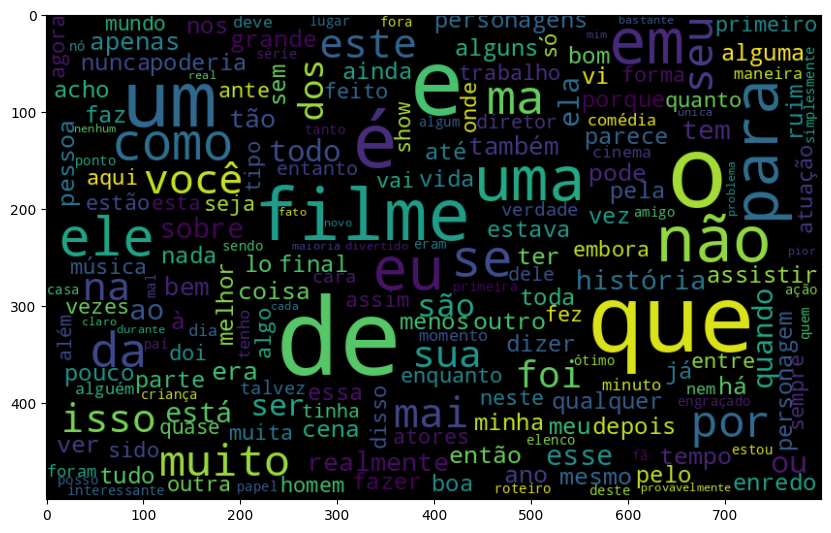

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis = 'off'
plt.show()

In [22]:
resenha.query("sentiment == 'pos'")

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
12389              1  
12390              1  
12391              1  
12392              1  
12393              1  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[24694 rows x 5 columns]

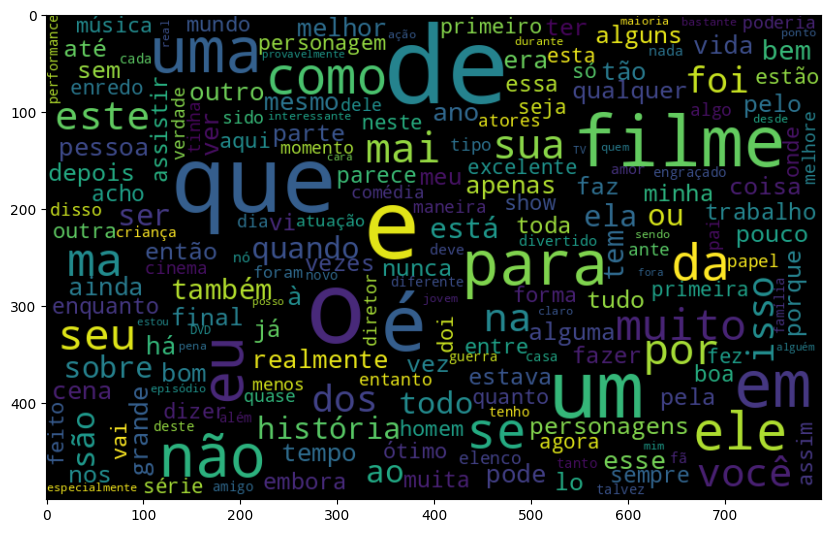

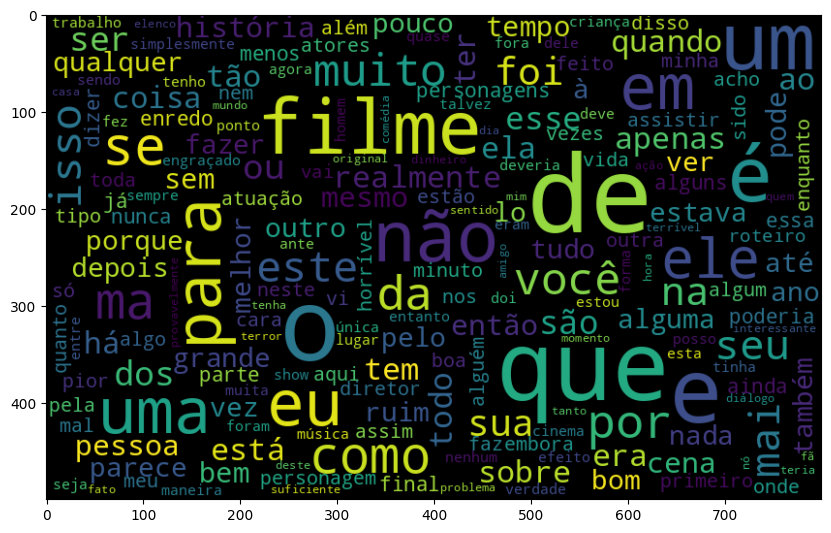

In [23]:
def nuvem_palavras(linhas, coluna_texto):
  todas_palavras = ' '.join([texto for texto in linhas[coluna_texto]])
  nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis = 'off'
  plt.show()

nuvem_palavras(resenha.query("sentiment == 'pos'"), 'text_pt')
nuvem_palavras(resenha.query("sentiment == 'neg'"), 'text_pt')

In [24]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [26]:
frases = ['um filme ruim', 'um filme bom']

frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [27]:
from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [28]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [29]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [30]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),'Frequencia':list(frequencia.values())})

In [31]:
df_frequencia.nlargest(columns='Frequencia', n=10)

Palavra  Frequencia
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

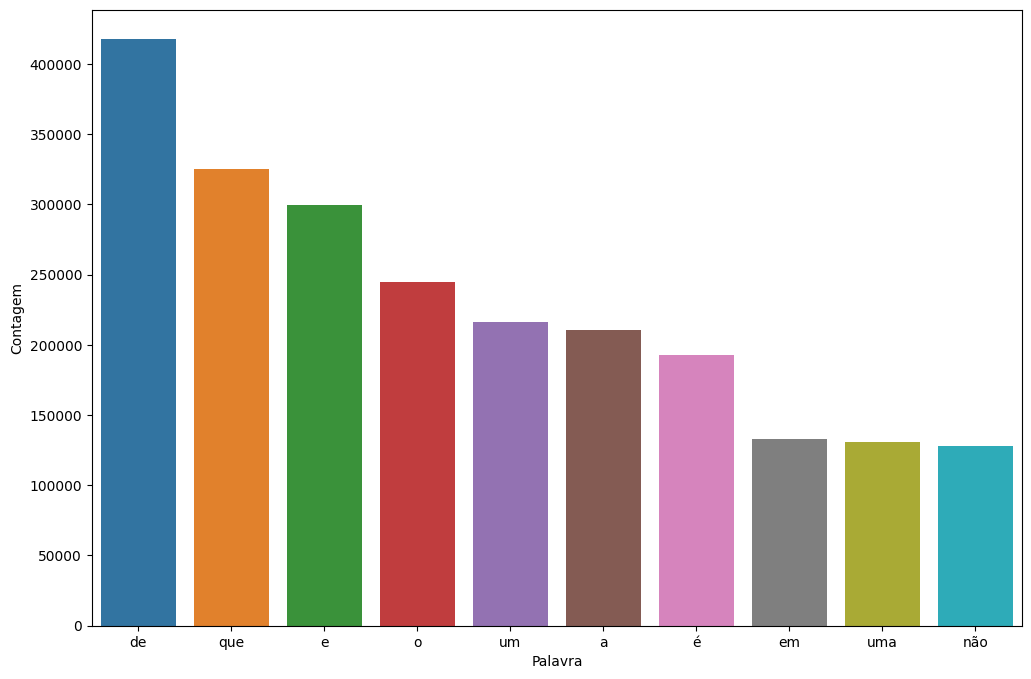

In [32]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia.nlargest(columns='Frequencia', n=10), x = 'Palavra', y = 'Frequencia')
ax.set(ylabel='Contagem')
plt.show()

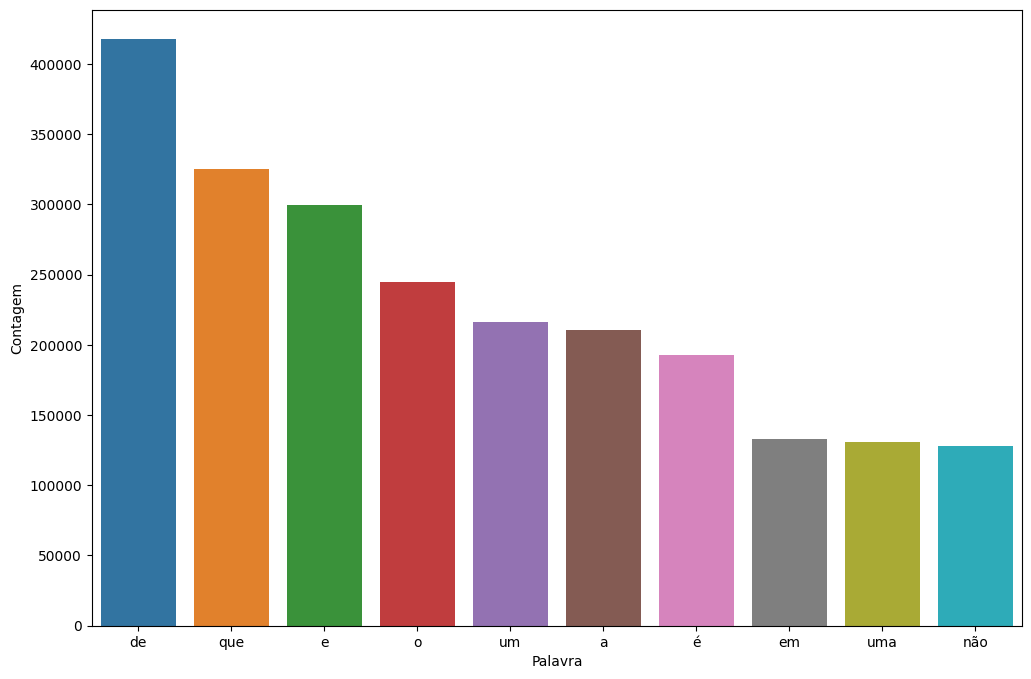

In [33]:
def pareto(texto, coluna, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna]])

  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),'Frequencia':list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns='Frequencia', n=quantidade)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia')
  ax.set(ylabel='Contagem')
  plt.show()

pareto(resenha, 'text_pt', 10)

In [34]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processada = list()

for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)

  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)

  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [35]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [36]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6811160533764659

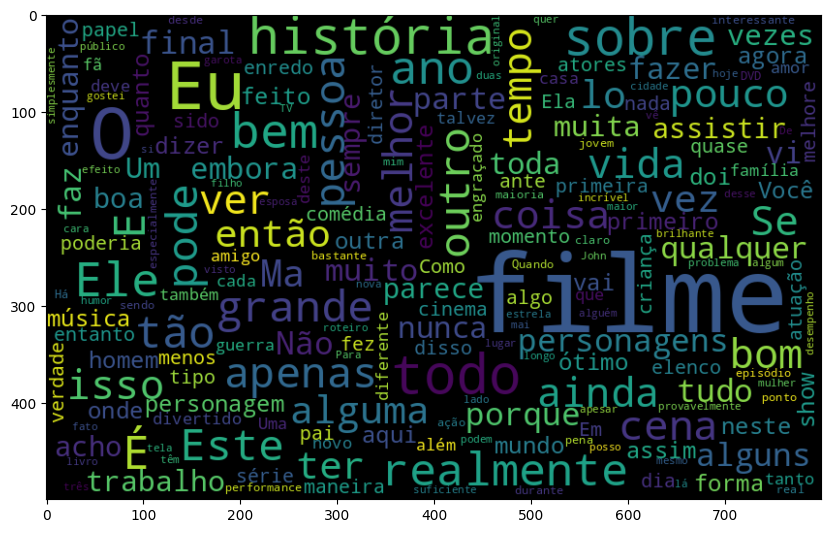

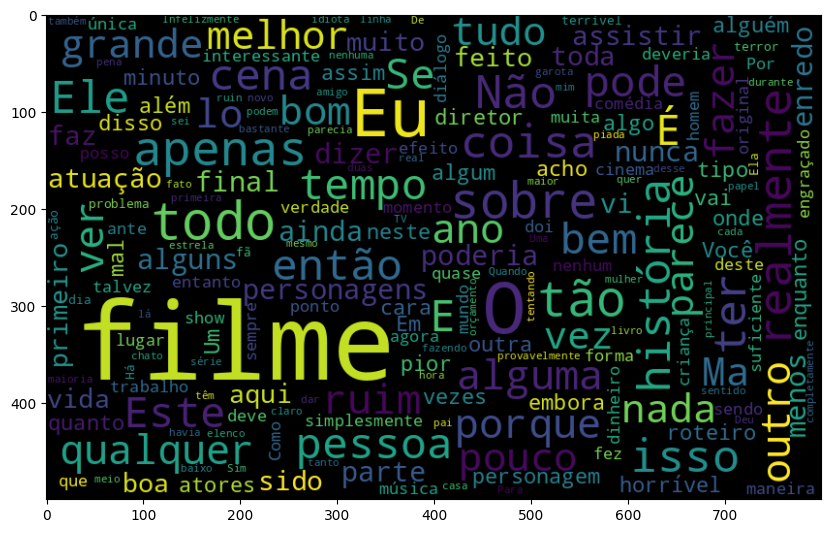

In [37]:
nuvem_palavras(resenha.query("sentiment == 'pos'"), 'tratamento_1')
nuvem_palavras(resenha.query("sentiment == 'neg'"), 'tratamento_1')

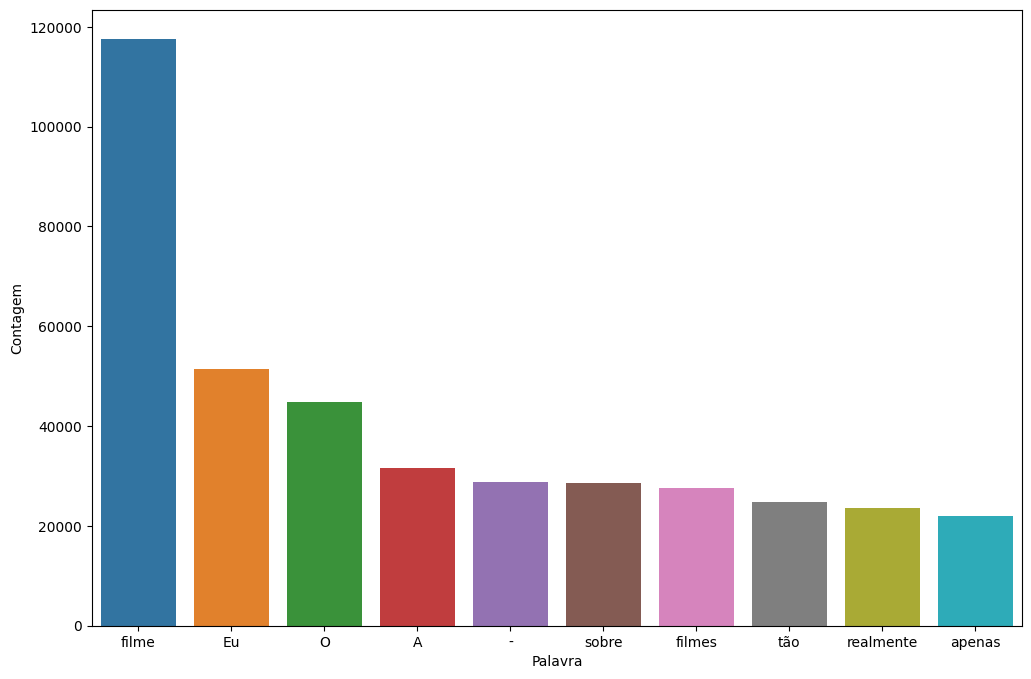

In [38]:
pareto(resenha, 'tratamento_1', 10)

In [39]:
from nltk import tokenize

frase = 'Olá mundo!'

token_pontuacao = tokenize.WordPunctTokenizer()

token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [40]:
from string import punctuation

In [41]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
pontuacao = list()

for ponto in punctuation:
  pontuacao.append(ponto)

In [43]:
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [44]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

In [45]:
frase_processada = list()

for opiniao in resenha['tratamento_1']:
  nova_frase = list()

  palavras_texto = token_pontuacao.tokenize(opiniao)

  for palavra in palavras_texto:
    if(palavra not in pontuacao_stopwords):
      nova_frase.append(palavra)
  
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

In [46]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [47]:
resenha['tratamento_1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [48]:
resenha['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

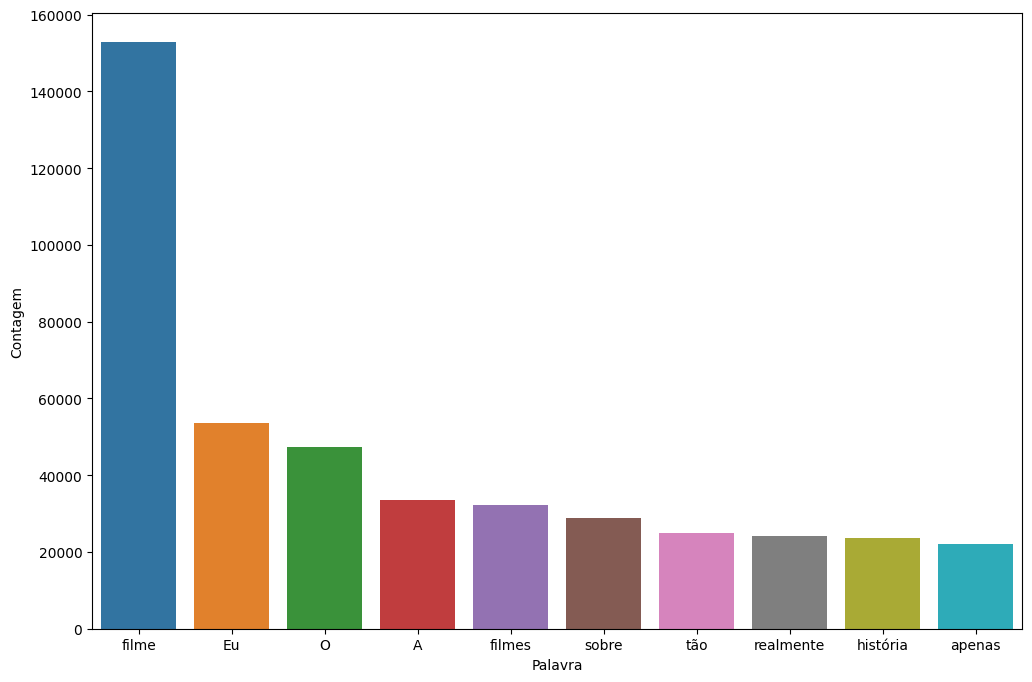

In [49]:
pareto(resenha, 'tratamento_2', 10)

In [51]:
!pip install unidecode

import unidecode

acentos = 'ótimo péssimo não é tão'

teste = unidecode.unidecode(acentos)

teste

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.3 MB/s eta 0:00:00


'otimo pessimo nao e tao'

In [52]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [53]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [55]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]


In [56]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [59]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()

for opiniao in resenha['tratamento_3']:
  nova_frase = list()

  palavras_texto = token_pontuacao.tokenize(opiniao)

  for palavra in palavras_texto:
    if(palavra not in pontuacao_stopwords):
      nova_frase.append(palavra)
  
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada

In [62]:
acuracia_tratamento_3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')

acuracia_tratamento_3

0.6887990295188031

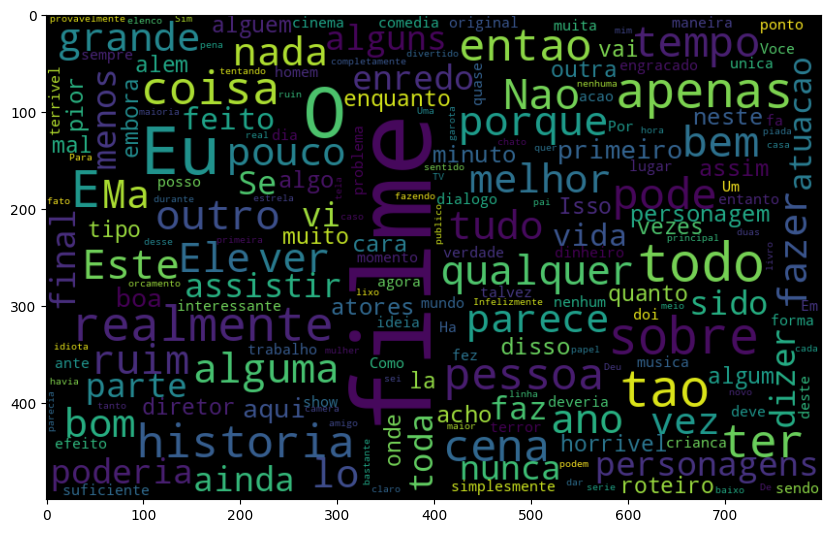

In [65]:
nuvem_palavras(resenha.query("sentiment == 'neg'"), 'tratamento_3')

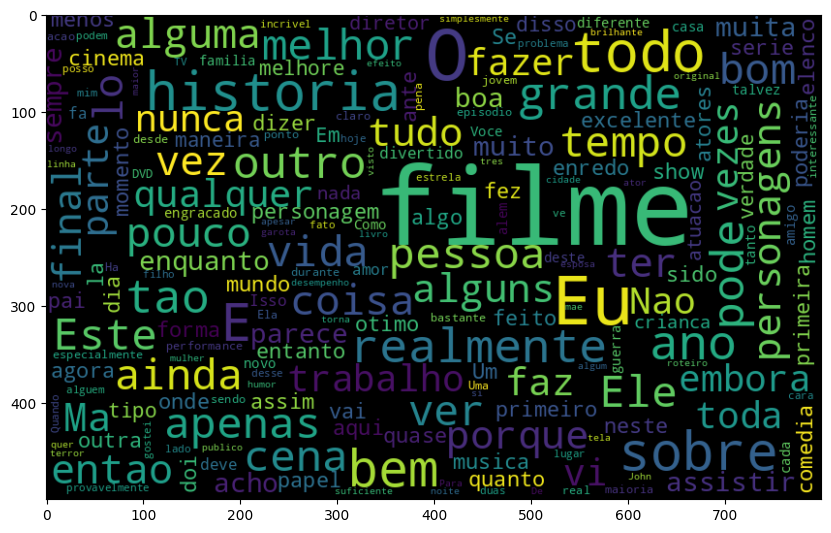

In [66]:
nuvem_palavras(resenha.query("sentiment == 'pos'"), 'tratamento_3')

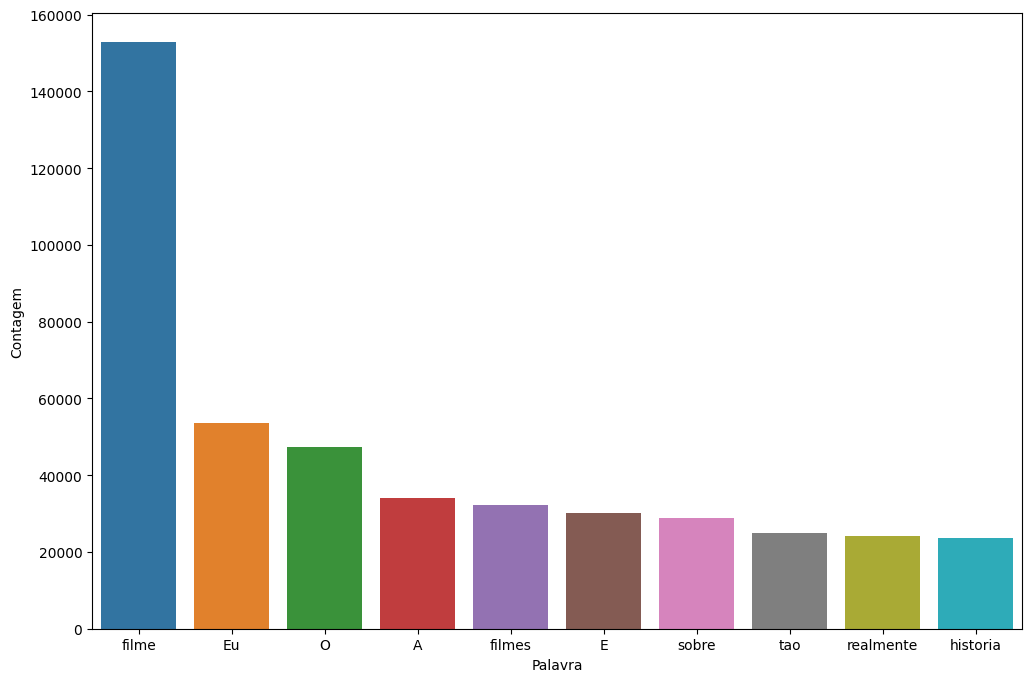

In [67]:
pareto(resenha, 'tratamento_3', 10)

In [68]:
frase = 'Testando o Teste dos Testes'
frase.lower()

'testando o teste dos testes'

In [69]:
frase_processada = list()

for opiniao in resenha['tratamento_3']:
  nova_frase = list()
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)

  for palavra in palavras_texto:
    if(palavra not in stopwords_sem_acento):
      nova_frase.append(palavra)
  
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [70]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [71]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [72]:
acuracia_tratamento_4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')

acuracia_tratamento_4

0.6874241811564901

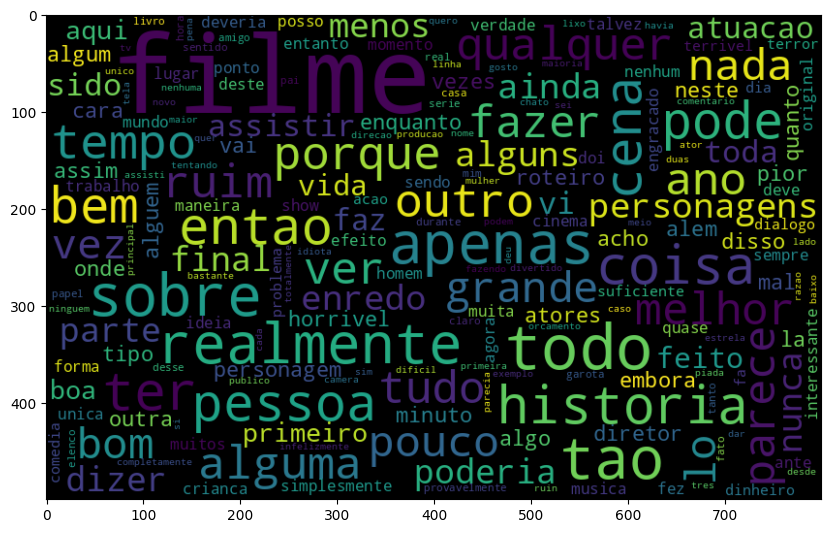

In [73]:
nuvem_palavras(resenha.query("sentiment == 'neg'"), 'tratamento_4')

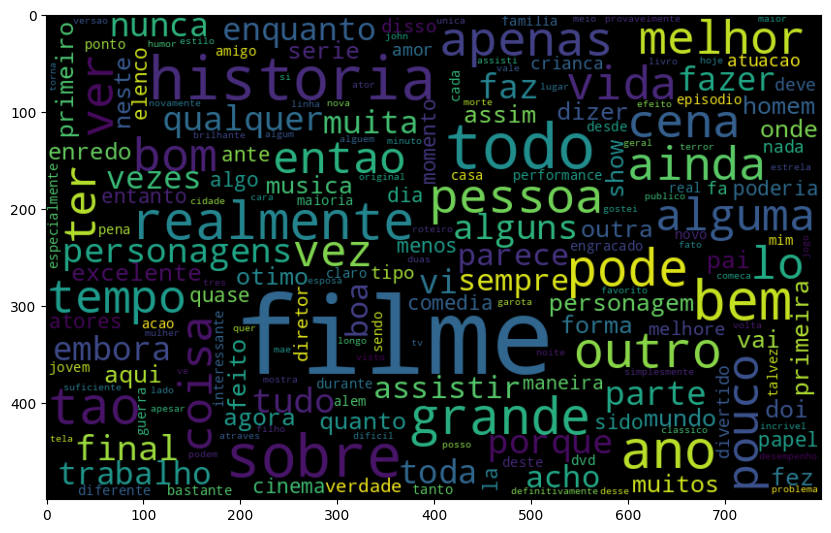

In [74]:
nuvem_palavras(resenha.query("sentiment == 'pos'"), 'tratamento_4')

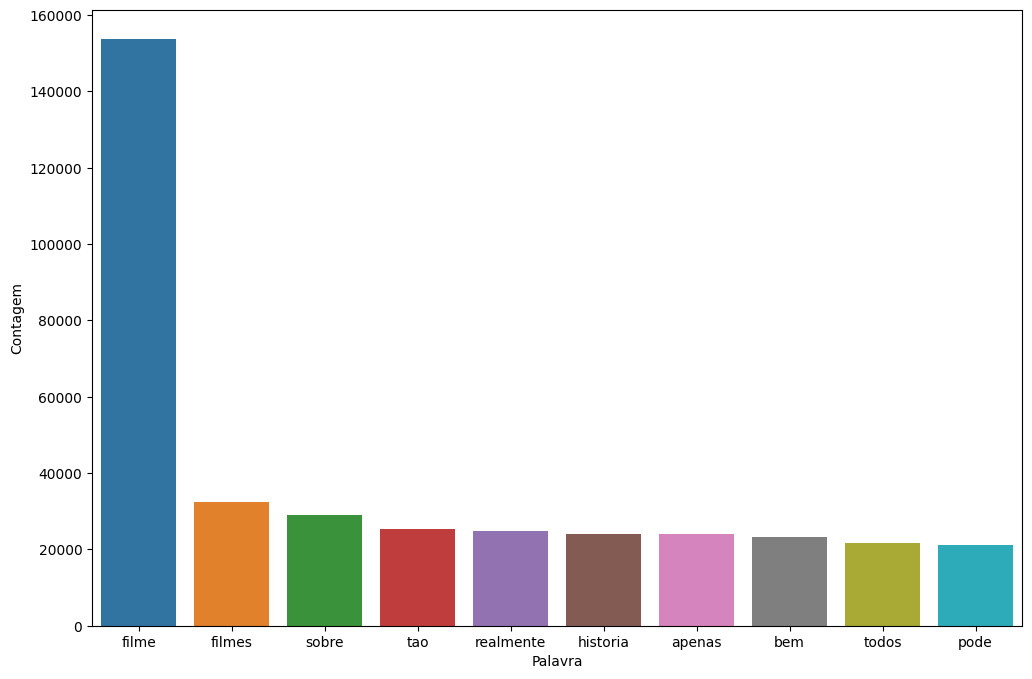

In [75]:
pareto(resenha, 'tratamento_4', 10)

In [77]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('corre')

'corr'

In [78]:
frase_processada = list()

for opiniao in resenha['tratamento_4']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)

  for palavra in palavras_texto:
    if(palavra not in stopwords_sem_acento):
      nova_frase.append(stemmer.stem(palavra))
  
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [79]:
acuracia_tratamento_5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')

acuracia_tratamento_5

0.6954306510311363

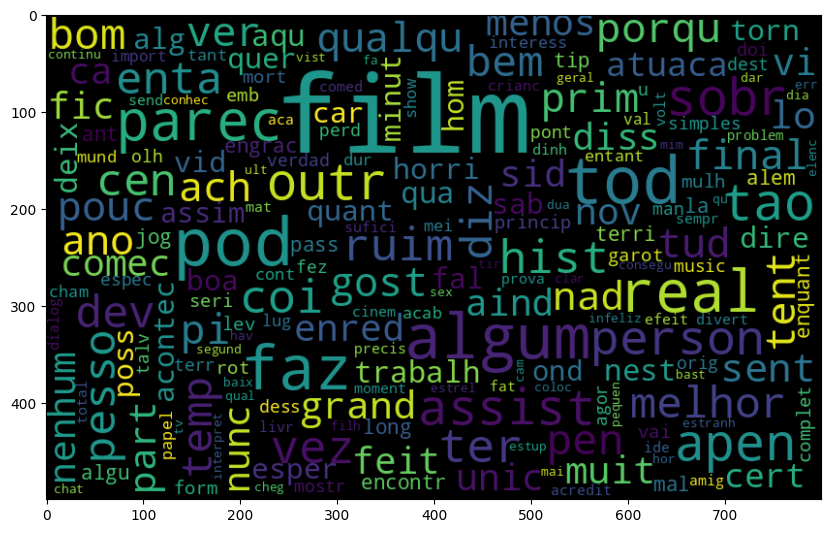

In [80]:
nuvem_palavras(resenha.query("sentiment == 'neg'"), 'tratamento_5')

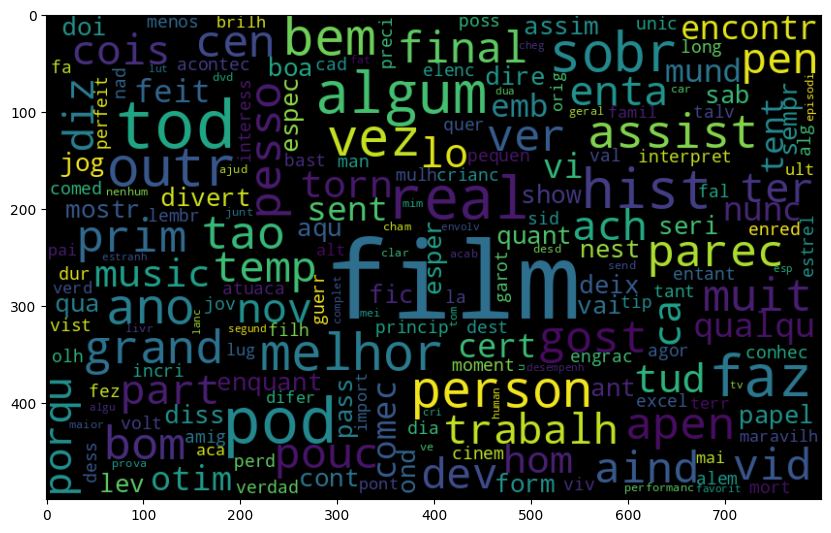

In [81]:
nuvem_palavras(resenha.query("sentiment == 'pos'"), 'tratamento_5')

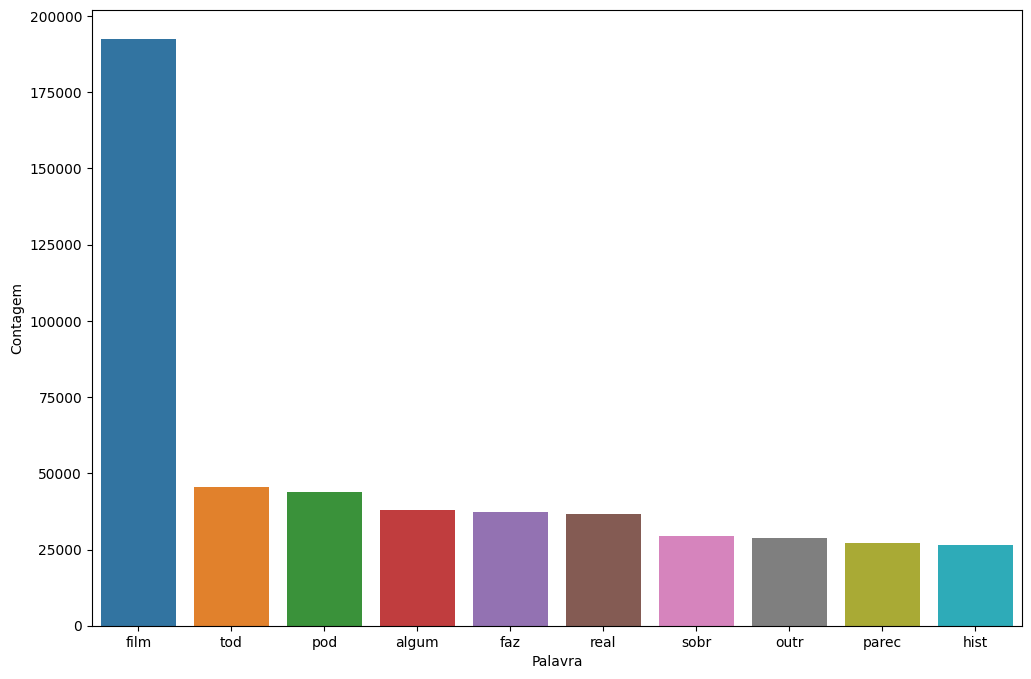

In [82]:
pareto(resenha, 'tratamento_5', 10)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features = 50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names_out())

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [86]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_bruto

0.6600889607763849

In [87]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratados

0.6963202587949858

In [88]:
from nltk import ngrams

frase = 'Assisti um ótimo filme.'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)

list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [90]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.8856449656287909

In [91]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf

0.8847553578649414

In [94]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index=tfidf.get_feature_names_out())

pesos.nlargest(50,0)

0
otim        8.308451
excel       7.993105
perfeit     6.548647
favorit     5.781222
maravilh    5.291919
incri       5.052568
hilari      4.654489
divert      4.552203
ador        4.410095
brilh       4.268983
hoj         4.208999
recom       4.193260
agrada      4.142806
definitiv   4.140716
soberb      3.571634
surpreend   3.568976
maravilhos  3.497071
ame         3.494009
bom         3.485223
class       3.461732
aind        3.449518
impression  3.391099
comov       3.371930
lind        3.179277
dvd         3.139172
mant        3.099778
fort        3.073881
joi         3.064277
fascin      3.039580
apreci      2.979812
subestim    2.962917
sutil       2.954938
gost        2.949307
melhor      2.942597
espec       2.852063
difer       2.845604
refresc     2.836752
sempr       2.794806
human       2.714753
am          2.707441
fantas      2.675634
emocion     2.626920
obr         2.615615
intens      2.613594
pequen      2.596311
inesper     2.591256
poder       2.588036
surpres     2.577649
performanc  2.573341
vai         2.550367

In [95]:
pesos.nsmallest(50,0)

0
pi         -9.184374
ruim       -9.178711
horri      -8.761561
terri      -7.195839
chat       -6.921857
nad        -6.032458
infeliz    -5.298478
decepca    -4.985072
ridicul    -4.971446
parec      -4.938893
nenhum     -4.921103
decepcion  -4.869331
lix        -4.851360
irrit      -4.757499
desperdici -4.725211
mal        -4.624505
tent       -4.429585
estup      -4.427532
rot        -4.423876
salv       -4.338478
pobr       -4.321695
minut      -4.137001
bagunc     -4.122282
desperdic  -4.057409
menos      -3.956943
supost     -3.923846
entedi     -3.922631
previsi    -3.830971
barat      -3.790758
frac       -3.721999
sid        -3.621864
tedi       -3.614255
mediocr    -3.580137
desculp    -3.532901
evit       -3.498785
clich      -3.344775
incomod    -3.340792
idiot      -3.238603
insult     -3.235946
oh         -3.222739
porc       -3.172981
pate       -3.143675
dinh       -3.124000
hipotes    -3.077079
risivel    -3.069501
inutil     -3.030824
apen       -2.944833
ter        -2.941855
ma         -2.834826
unic       -2.786838